In [1]:
import numpy as np
import math  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2-4*x+5

In [3]:
f(3)

20

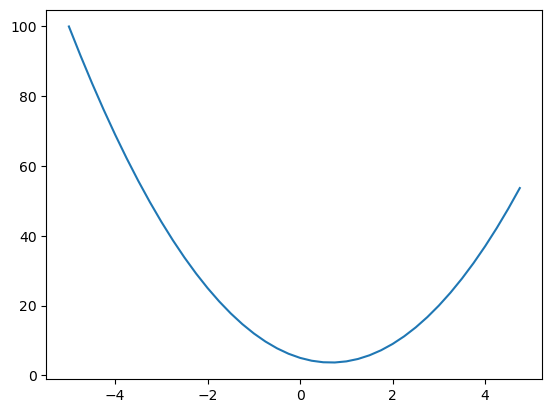

In [4]:
xs=np.arange(-5,5,0.25)
ys=f(xs)
plt.plot(xs,ys)

In [5]:
h = 0.001
x =3.00
limit=(f(x+h)-f(x))/h
print(limit)

14.00300000000243


In [6]:
a=2.0
b=-3.0
c=10.0
d=a*b+c
print(d)

4.0


In [7]:
h=0.0001
a=2.0
b=-3.0
c=10.0

d1=a*b+c
# a+=h
c+=h
d2=a*b+c
print(f"d1 : {d1}")
print(f"d2 : {d2}")
print(F"slope : {(d2-d1)/h}") # lim(f(x+h)-f(x))/h

d1 : 4.0
d2 : 4.0001
slope : 0.9999999999976694


In [8]:
class Value():
    def __init__(self,data,_childern=(),_op='',label=''):
        self.data=data
        self.grad=0.0
        self._backward=lambda: None  # by defult wont do nothing
        self._prev=set(_childern)
        self._op=_op
        self.label=label
        
    def __repr__(self):
        return f"value: data={self.data}"
    
    def __add__(self,other):
        # assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out=Value(self.data + other.data,(self,other),'+')
        def _backward():
            self.grad+=1.0 * out.grad
            other.grad+=1.0* out.grad
        out._backward=_backward
        return out
    
    def __mul__(self,other):
        # assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out=Value(self.data*other.data,(self,other),'*')
        def _backward():
            self.grad+=other.data * out.grad
            other.grad+=self.data * out.grad
        out._backward=_backward
        return out
    
    def exp(self):
        x=self.data
        out=Value(math.exp(x),(self, ),'exp')
        def _backward():
            self.grad=out.data*out.grad
        out._backward=_backward
    
    def __rmul__(self, other): # other * self
        return self * other
    
    
    def tanh(self):
        x=self.data
        t=(math.exp(2*x)-1)/(math.exp(2*x)+1)
        out=Value(t,(self, ),"tanh")
        def _backward():
            self.grad+=(1-t**2)*out.grad
        out._backward=_backward
        return out
        
    def backward(self):     
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)

        self.grad=1.0
        for node in reversed(topo):
            node._backward()

a=Value(2.0,label='a')
b=Value(-3.0 ,label='b')
c=Value(10.0,label='c')
print(a+b)
print(a*b)
e=a*b
e.label='e'
d=e+c
d.label='d'
d._prev
f=Value(-2.0, label='f')
L=d*f
L.label='L'

value: data=-1.0
value: data=-6.0


In [9]:
from graphviz import Digraph

def trace(root):
    nodes,edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add(((child,v)))
                build(child)
    build(root)
    return(nodes,edges)

def draw_dot(root, format='svg', rankdir='LR'):
    assert rankdir in ['LR', 'TB']

    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data %.4f| grad %4f }" % (n.label,n.data, n.grad), shape='record')

        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

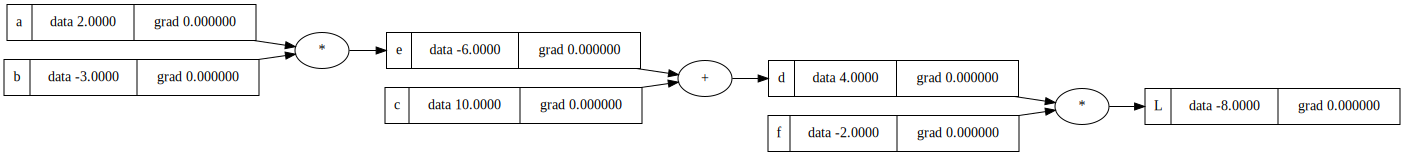

In [10]:
draw_dot(L)

In [11]:
L.grad=1.0
d.grad=-2.0
f.grad=4.0
c.grad=-2.0
e.grad=-2.0
a.grad=6.0
b.grad=-4.0
"""
lets find the 
dl/dd
dl/de

L=d*f
-- dl/dd
(f(x+h)-f(x))/h
((d+h)*f)-(d*f))/h
(h*f)/h=f

-- dl/de=
(d*f+d*h)-d*f)/h=d


d=c+e   derivative of addition is 1
-- dd/dc
(C+h+e)-(c+e)/h=1

-- dd/de=1

---chain rule---
dl/dc=dl/dd * (dd/dc)=-2*1=-1
dl/de=dl/dd * (dd/de)=-2*1=-2



dl/da=dl/de * de/da=-3*-2=6
dl/db=dl/de *de/db=2*-2

-- de/da=-3.0
e=a*b
a*b+ h*b - a*b/h=-3.0



--de/db=2.0
a*h/h=a
"""

'\nlets find the \ndl/dd\ndl/de\n\nL=d*f\n-- dl/dd\n(f(x+h)-f(x))/h\n((d+h)*f)-(d*f))/h\n(h*f)/h=f\n\n-- dl/de=\n(d*f+d*h)-d*f)/h=d\n\n\nd=c+e   derivative of addition is 1\n-- dd/dc\n(C+h+e)-(c+e)/h=1\n\n-- dd/de=1\n\n---chain rule---\ndl/dc=dl/dd * (dd/dc)=-2*1=-1\ndl/de=dl/dd * (dd/de)=-2*1=-2\n\n\n\ndl/da=dl/de * de/da=-3*-2=6\ndl/db=dl/de *de/db=2*-2\n\n-- de/da=-3.0\ne=a*b\na*b+ h*b - a*b/h=-3.0\n\n\n\n--de/db=2.0\na*h/h=a\n'

In [12]:
# single optimization process

a.data+=0.01*a.grad
b.data+=0.01*b.grad
c.data+=0.01*c.grad
f.data+=0.01*f.grad

e=a*b
d=e+c
L=d*f

L

value: data=-7.286496

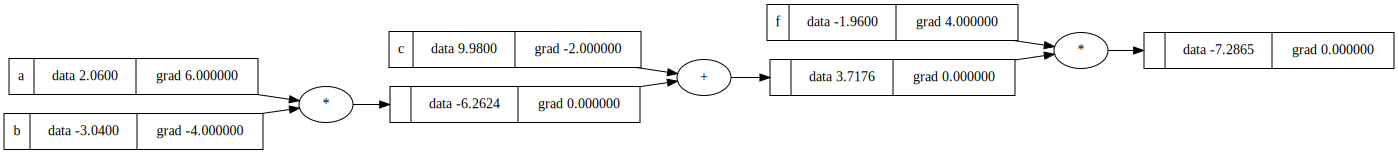

In [13]:
draw_dot(L)

In [14]:
# to double-check the grad
def lol():
    h=0.001

    a=Value(2.0,label='a')
    b=Value(-3.0 ,label='b')
    c=Value(10.0,label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f=Value(-2.0, label='f')
    L=d*f;L.label='L'
    L1=L.data

    a=Value(2.0,label='a')
    b=Value(-3.0 ,label='b')
    c=Value(10.0,label='c')
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f=Value(-2.0, label='f')
    L=d*f;L.label='L'
    L2=L.data +h

    print((L2-L1)/h)

In [15]:
lol()

1.000000000000334


In [16]:
# activation functions 
"""
    threshold
    sigmoid 
    relu
    tanh
"""

'\n    threshold\n    sigmoid \n    relu\n    tanh\n'

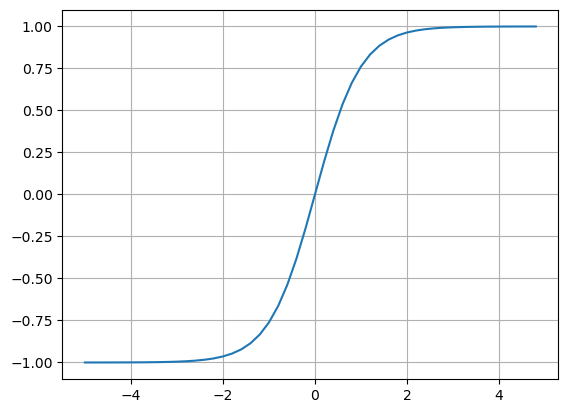

In [17]:
## tanh activtion function 
plt.plot(np.arange(-5,5,0.2),np.tanh(np.arange(-5,5,0.2)))
plt.grid()

In [18]:
## complex Neural networks

x1=Value(2.0,label="x1")
x2=Value(0.0,label="x2")
w1=Value(-3.0,label="w1")
w2=Value(1.0,label="w2")
b=Value(6.8813735070195432,label="b")

x1w1=x1*w1;x1w1.label="x1w1"
x2w2=x2*w2;x2w2.label="x2w2"

x1w1x2w2=x1w1 + x2w2; x1w1x2w2.label="x1w1x2w2"
n=x1w1x2w2+b; n.label="n"

o=n.tanh(); o.label="o"


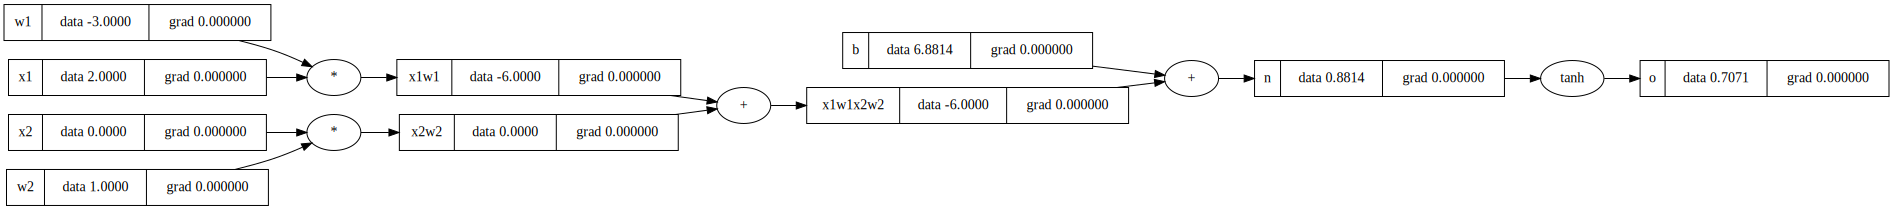

In [19]:
draw_dot(o)

In [20]:
"""
manual 

"""
# o.grad=1.0
# n.grad=0.5
# x1w1x2w2.grad=0.5
# b.grad=0.5
# x1w1.grad=0.5
# x2w2.grad=0.5
# x2.grad=w2.data*x2w2.grad
# w2.grad=x2.data*x2w2.grad
# x1.grad=w1.data*x1w1.grad
# w1.grad=x1.data*x1w1.grad

'\nmanual \n\n'

In [21]:
"""
do/dn 
dtanhx/dx=1-tanh^2 x
1-o.data**2
"""

'\ndo/dn \ndtanhx/dx=1-tanh^2 x\n1-o.data**2\n'

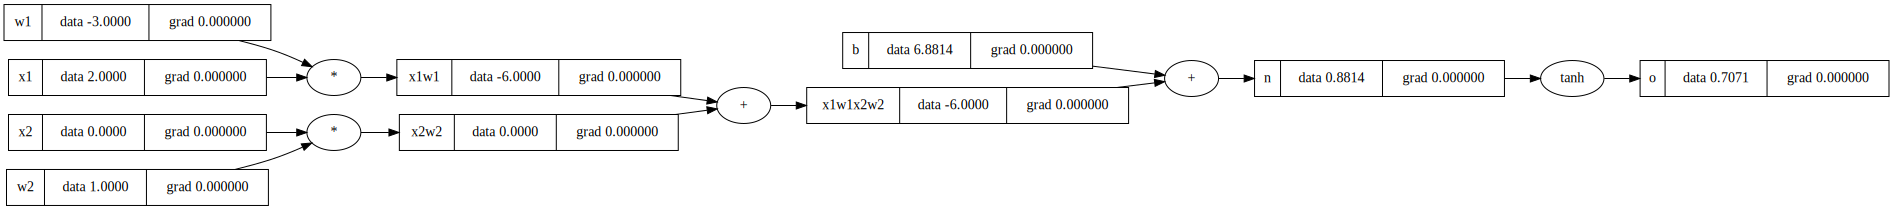

In [22]:
draw_dot(o)

In [23]:
o.backward()

In [24]:
# o.grad=1.0

In [25]:
# o._backward()

In [26]:
# n._backward()

In [27]:
# b._backward()


In [28]:
# x1w1x2w2._backward()

In [29]:
# x1w1._backward()
x2w2._backward()

In [30]:
# using topoloigical sort

o.grad=1.0

topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)
topo

[value: data=6.881373507019543,
 value: data=0.0,
 value: data=1.0,
 value: data=0.0,
 value: data=2.0,
 value: data=-3.0,
 value: data=-6.0,
 value: data=-6.0,
 value: data=0.8813735070195428,
 value: data=0.7071067411865452]